# Data Wrangling

This is one of the hardest parts of working with data. Raw data is rarely ready to be analyzed. Scientists spend a lot of time manipulating their data to get it into a form that can be used. We call it "wrangling".

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Cats_in_aoshima_island_1.JPG/1600px-Cats_in_aoshima_island_1.JPG' width = 400>

Possible problems with data:
* Getting the data you need 
* Data Types
* Incorrect units

## Polar Vortex

During the polar vortex in January of 2019, record low temperatures were set around Chicago. On Northerly Island, the National Weather Service recorded a low. One of the nodes (001e06113cf1) is on Michigan Avenue and Randolph Street by Millenium Park, not far from Northerly Island.

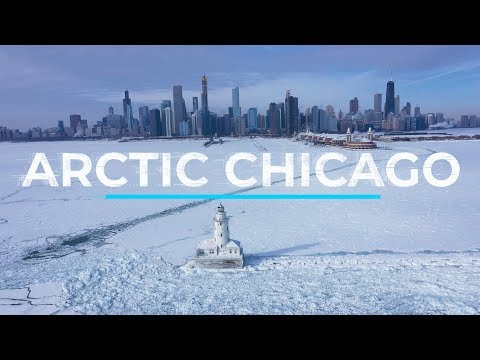

In [33]:
from IPython.display import Audio,Image, YouTubeVideo
id='MxNTryzRQ8Q'
YouTubeVideo(id=id,width=600,height=300)

### How cold did it get during the polar vortex?

### 1. Filtering the data you need

Data for the node **001e06113cf1** has already been extracted into dataset `polarvortex.csv` for you to use.

AoT nodes collect all sorts of data. For this question, we just want the temperature data. So we will have to filter out the data we don't need.

In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [17]:
polar = pd.read_csv('../AoT/Data_Wrangling/data/polarvortex.csv')
polar.head()

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,4097665,2019-01-30 00:00:24,001e06113cf1,lightsense,apds_9006_020,intensity,65535,5267.409
1,4097666,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,humidity,65535,100.0
2,4097667,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,temperature,65535,125.01
3,4097668,2019-01-30 00:00:24,001e06113cf1,lightsense,hmc5883l,magnetic_field_x,-1,-0.909
4,4097669,2019-01-30 00:00:24,001e06113cf1,lightsense,hmc5883l,magnetic_field_y,-1,-0.909


Let's first figure out what measurements the node is recording.

In [18]:
polar['parameter'].drop_duplicates()

0            intensity
1             humidity
2          temperature
3     magnetic_field_x
4     magnetic_field_y
5     magnetic_field_z
11            pressure
16                  id
17      acceleration_x
18      acceleration_y
19      acceleration_z
Name: parameter, dtype: object

Here is the key step where we filter and create a new dataframe that only contains the temperature readings.

In [19]:
temp = polar[(polar['parameter'] == "temperature")]

In [20]:
temp

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
2,4097667,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,temperature,65535,125.01
8,4097673,2019-01-30 00:00:24,001e06113cf1,lightsense,tmp421,temperature,65535,-0.06
12,4097677,2019-01-30 00:00:24,001e06113cf1,metsense,bmp180,temperature,65535,241.0
15,4097680,2019-01-30 00:00:24,001e06113cf1,metsense,htu21d,temperature,65535,128.86
20,4097685,2019-01-30 00:00:24,001e06113cf1,metsense,pr103j2,temperature,396,-15.4
...,...,...,...,...,...,...,...,...
169012,4266677,2019-01-31 23:59:57,001e06113cf1,metsense,bmp180,temperature,65535,241.0
169015,4266680,2019-01-31 23:59:57,001e06113cf1,metsense,htu21d,temperature,65535,128.86
169020,4266685,2019-01-31 23:59:57,001e06113cf1,metsense,pr103j2,temperature,378,-16.7
169022,4266687,2019-01-31 23:59:57,001e06113cf1,metsense,tmp112,temperature,65535,-254.0


To find the low temperature during the polar vortex, we can use the `.min()` method.

In [21]:
temp['value_hrf'].min()

'-0.06'

This doesn't make sense. We can see that there are lower values than -0.06. The hint is in the quotes.

Scientific data, like most data, is messy. Unfortunately, there is so much of it, we can't look at it line by line to search for bad data. Fortunately, there are some good techniques we can use to sniff out bad data.

A computer sees the values differently than we do. Don't assume.

In [22]:
temp.dtypes

Unnamed: 0     int64
timestamp     object
node_id       object
subsystem     object
sensor        object
parameter     object
value_raw     object
value_hrf     object
dtype: object

`object` means string. The `.min()` method only works for numbers.

In [23]:
temp['value_hrf'] = pd.to_numeric(temp['value_hrf'])

Pandas doesn't like when you try to write over existing data. This is what you should do.

In [24]:
temp.loc[:, 'value_hrf'] = pd.to_numeric(temp['value_hrf'])

In [25]:
temp.dtypes

Unnamed: 0      int64
timestamp      object
node_id        object
subsystem      object
sensor         object
parameter      object
value_raw      object
value_hrf     float64
dtype: object

### 2. Working with Values

Now that we have our temperatures in `float`, we can do some math on them. The temperatures for all the sensors are in Celsius. Let's convert them to Fahrenheit so they are easier to understand.

$$ T(F) = \frac{9}{5}T(C)+32 $$

In [26]:
def Celsius_to_Fahrenheit(temp_C):
    temp_F = (temp_C * 9/5) + 32
    return temp_F

In [27]:
temp.loc[:, 'Temp_F'] = temp['value_hrf'].apply(Celsius_to_Fahrenheit)

temp.head()

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temp_F
2,4097667,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,temperature,65535,125.01,257.018
8,4097673,2019-01-30 00:00:24,001e06113cf1,lightsense,tmp421,temperature,65535,-0.06,31.892
12,4097677,2019-01-30 00:00:24,001e06113cf1,metsense,bmp180,temperature,65535,241.00,465.800
15,4097680,2019-01-30 00:00:24,001e06113cf1,metsense,htu21d,temperature,65535,128.86,263.948
20,4097685,2019-01-30 00:00:24,001e06113cf1,metsense,pr103j2,temperature,396,-15.40,4.280


# Small Group Exercise: How low can you go?

<img src = '../images/thermometer.jpeg' width = 400>

Now that you have "wrangled" your data. The task is simple: **What was the coldest temperature recorded by this node during the polar vortex?**

Some guidance...
1. Get an idea of the range of temperature values.
2. There are several different temperature sensures in this one node. Find out which temperature sensor is most reliable.

In [28]:
temp['Temp_F'].min()

-425.2

In [29]:
temp['Temp_F'].describe()

count    47327.000000
mean       143.656079
std        284.182250
min       -425.200000
25%         -1.660000
50%        257.018000
75%        418.550000
max        465.800000
Name: Temp_F, dtype: float64

In [30]:
temp['sensor'].drop_duplicates()

2     hih6130
8      tmp421
12     bmp180
15     htu21d
20    pr103j2
22     tmp112
24     tsys01
Name: sensor, dtype: object

It looks like we have multiple temperature sensors. 

In [31]:
sensor = temp[(temp['sensor'] == 'pr103j2')]
sensor['Temp_F'].min()

-16.15

### Small Group Follow-Up

According to the National Weather Service, the record low set at Northerly Island was -21 degrees F. Why the difference of 5 degrees? Most likely, the electronics in the node gave off enough heat to warm the sensor by a few degrees. Never assume that a measurment is 100% accurate. 